In [11]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

normal_data = './data/eval/eval_normal_0000.wav'
sr= 25600


normal_data = librosa.load(normal_data, sr=sr)

In [85]:
import torch.nn as nn
import torch

m = nn.Linear(2,2)

# print(m.weight.shape)
# print(m.bias.shape)


a = torch.randn(32, 2, 128, 51)
orig_size = a.shape
print(a[0][0].shape)
print(a[0][1].shape)
var1 = a[0][0] * a[0][1]
var1 = torch.cat((a[0][0], a[0][1]), dim=0)
print(var1)
b = torch.reshape(a, (orig_size[0], -1, orig_size[-1]))
print(b[0])

# var1과 b[0] 비교
comparison = (var1 == b[0])

# True와 False 개수 계산
true_count = torch.sum(comparison).item()  # True의 개수
false_count = comparison.numel() - true_count  # 전체 요소 수에서 True 개수 빼기

print(f"True 개수: {true_count}")
print(f"False 개수: {false_count}")

torch.Size([128, 51])
torch.Size([128, 51])
tensor([[ 0.0429,  1.3444,  0.8088,  ..., -1.4808, -0.6631,  2.0674],
        [-0.6774,  2.7500,  0.1584,  ...,  0.2526,  0.6675,  0.2836],
        [-0.2723,  0.6558, -0.5487,  ..., -0.4112, -0.4227, -0.2294],
        ...,
        [ 2.1559,  0.3273, -0.5616,  ...,  1.5766,  0.1379,  1.1629],
        [ 1.6514, -0.6632, -1.0353,  ..., -1.5236,  0.4576,  0.8490],
        [-0.6588,  0.9967,  0.2648,  ..., -1.2809, -0.6524,  0.3086]])
tensor([[ 0.0429,  1.3444,  0.8088,  ..., -1.4808, -0.6631,  2.0674],
        [-0.6774,  2.7500,  0.1584,  ...,  0.2526,  0.6675,  0.2836],
        [-0.2723,  0.6558, -0.5487,  ..., -0.4112, -0.4227, -0.2294],
        ...,
        [ 2.1559,  0.3273, -0.5616,  ...,  1.5766,  0.1379,  1.1629],
        [ 1.6514, -0.6632, -1.0353,  ..., -1.5236,  0.4576,  0.8490],
        [-0.6588,  0.9967,  0.2648,  ..., -1.2809, -0.6524,  0.3086]])
True 개수: 13056
False 개수: 0


In [19]:
# print(normal_data)

import soundfile


normal_data = './data/eval/eval_normal_0000.wav'

normal_data_s = soundfile.read(normal_data)
normal_data_s

(array([[-0.19937134, -0.08074951],
        [-0.15182495, -0.0612793 ],
        [ 0.12585449,  0.22793579],
        ...,
        [ 0.02545166,  0.03173828],
        [ 0.06271362,  0.0463562 ],
        [-0.21472168, -0.21099854]]),
 25600)

In [21]:
normal_data = './data/eval/eval_normal_0000.wav'
sr= 25600


normal_data_l = librosa.load(normal_data, sr=sr)
normal_data_l

(array([-0.14006042, -0.10655212,  0.17689514, ...,  0.02859497,
         0.05453491, -0.2128601 ], dtype=float32),
 25600)

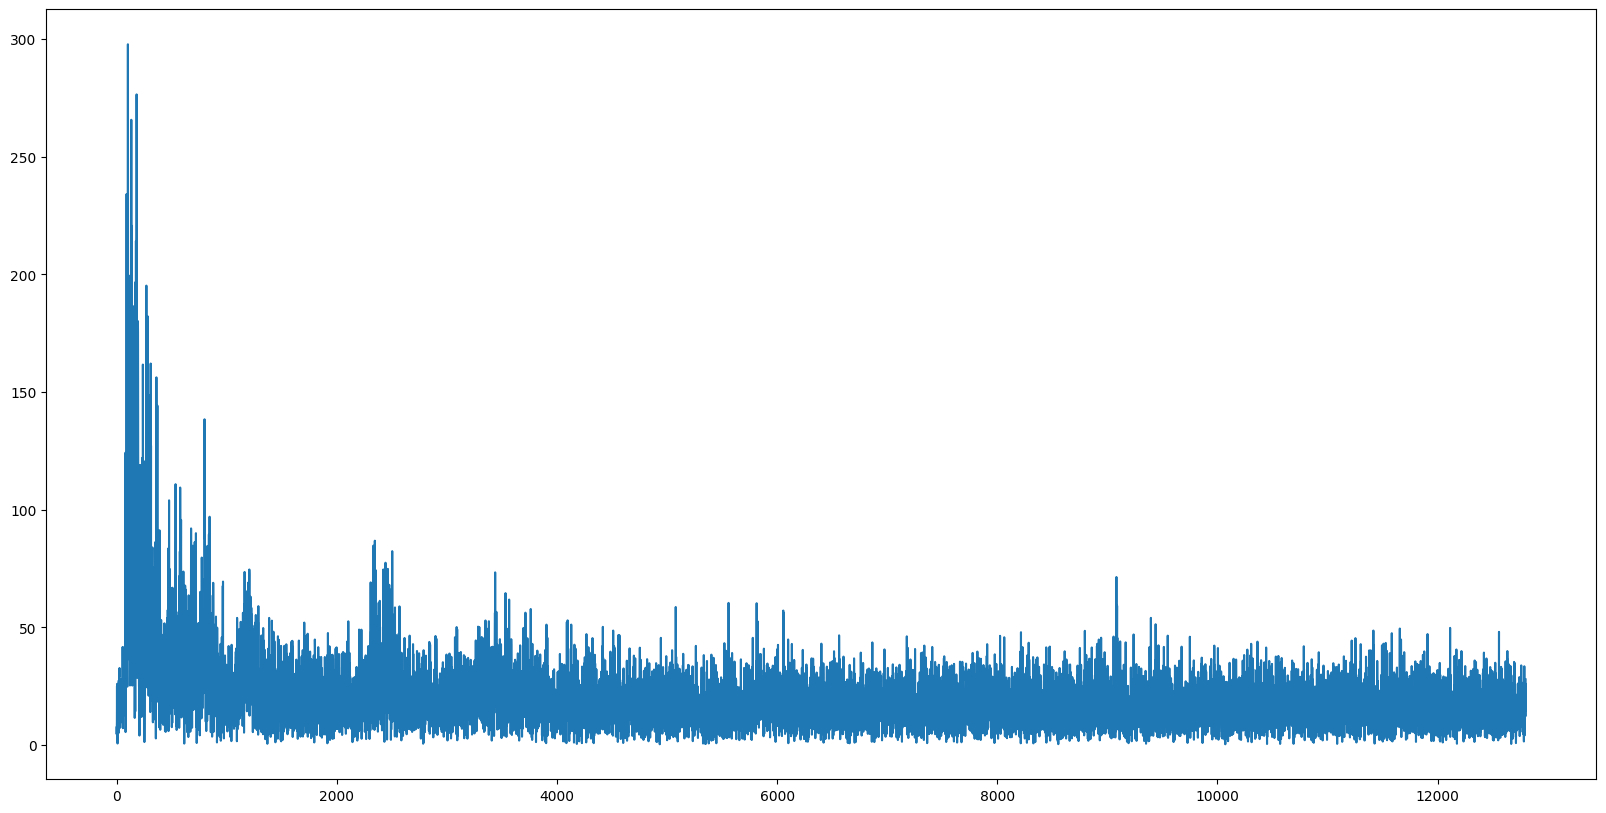

In [22]:
fft = np.fft.fft(normal_data_l[0])
mag = np.abs(fft)
freq = np.linspace(0, sr, len(mag))

plt.figure(figsize=(20,10))
plt.plot(freq[:int(len(freq)/2)], mag[:int(len(mag)/2)])
# plt.plot(fft)